# Project
## Toan Diec 300320364

### Load Library

In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.feature_selection import VarianceThreshold,SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,  Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier

%matplotlib inline


In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def rocPlot(X_test,y_test,model):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

In [54]:
from sklearn.cluster import KMeans
def findElbow(df):
    sse = {}

    # Fit KMeans and calculate SSE for each k
    for k in range(1, 10):
  
        # Initialize KMeans with k clusters
        kmeans = KMeans(n_clusters=k, random_state=1)
        # Fit KMeans on the normalized dataset
        kmeans.fit(df)

        sse[k] = kmeans.inertia_
    
    #plot the Elbow
    plt.figure(figsize=(6,4))
    plt.title('The Elbow Method')
    plt.xlabel('k'); 
    plt.ylabel('Sum of squared errors')
    sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
    plt.show()

### Read dataset

In [55]:
#read the file 
df = pd.read_csv('Training_Dataset_v2.csv')
df.head()

C:\Users\xboys\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [56]:
df.shape

(1687861, 23)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

### EDA and Hypothesis

In [103]:
#summary statistic
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,9.638086e-01,4.330928e-04,6.690721e-03
std,2.961523e+04,6.841885e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [73]:
#looking for high correlated variables
df1_corr= df1.corr().abs()
df1_corr

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,0.008099,0.188246,0.204429,0.207705,0.205273,0.201463,0.253625,0.275908,0.283052,...,0.080501,0.007493,0.007094,0.014015,0.009688,0.000606,0.001580,0.006215,0.000402,0.002549
lead_time,0.008099,1.000000,0.007187,0.007892,0.008430,0.008664,0.005993,0.007300,0.007313,0.007373,...,0.001473,0.010320,0.005918,0.001123,0.122973,0.003079,0.008765,0.273601,0.002719,0.017864
in_transit_qty,0.188246,0.007187,1.000000,0.702132,0.729055,0.720137,0.573700,0.665423,0.679486,0.663920,...,0.178260,0.004849,0.002045,0.043629,0.015452,0.002710,0.003124,0.003989,0.000277,0.002635
forecast_3_month,0.204429,0.007892,0.702132,1.000000,0.990723,0.977822,0.736267,0.846631,0.863755,0.843395,...,0.362445,0.006743,0.003403,0.040617,0.016398,0.002770,0.003542,0.001306,0.000218,0.000515
forecast_6_month,0.207705,0.008430,0.729055,0.990723,1.000000,0.995003,0.754951,0.876638,0.897492,0.876944,...,0.364624,0.007508,0.003715,0.041153,0.016674,0.002446,0.003697,0.002007,0.000380,0.000995
forecast_9_month,0.205273,0.008664,0.720137,0.977822,0.995003,1.000000,0.770844,0.899796,0.922310,0.901319,...,0.367636,0.007793,0.003753,0.041255,0.016817,0.002466,0.003755,0.002115,0.000436,0.001176
sales_1_month,0.201463,0.005993,0.573700,0.736267,0.754951,0.770844,1.000000,0.908026,0.869891,0.831151,...,0.269540,0.006803,0.002556,0.046463,0.014152,0.003656,0.003426,0.000750,0.000437,0.001302
sales_3_month,0.253625,0.007300,0.665423,0.846631,0.876638,0.899796,0.908026,1.000000,0.988509,0.955172,...,0.331486,0.007522,0.002633,0.051053,0.016674,0.003789,0.003898,0.000968,0.000501,0.001725
sales_6_month,0.275908,0.007313,0.679486,0.863755,0.897492,0.922310,0.869891,0.988509,1.000000,0.973518,...,0.335847,0.007345,0.002279,0.046300,0.017025,0.003736,0.003834,0.001112,0.000492,0.001891
sales_9_month,0.283052,0.007373,0.663920,0.843395,0.876944,0.901319,0.831151,0.955172,0.973518,1.000000,...,0.325889,0.007588,0.002641,0.041132,0.016930,0.003541,0.003904,0.001456,0.000499,0.001915


<AxesSubplot:>

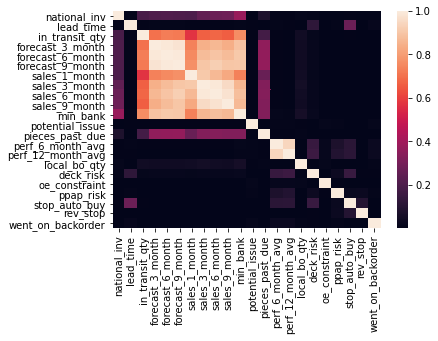

In [74]:
sns.heatmap(df1_corr.abs(), xticklabels=df1.columns, yticklabels=df1.columns)

#### Observation and Hypothesis

### Feature Engineering

In [58]:
#check for null value
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [59]:
#replace nan in lead_time column with mean value of lead_time column
df['lead_time'] = df['lead_time'].fillna(df.lead_time.mean())

In [60]:
#check for null value
df.isnull().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [61]:
df.dropna(inplace = True)

In [62]:
#Check duplicate value in Order_Id column
df.duplicated(subset= None, keep= 'first')

0          False
1          False
2          False
3          False
4          False
           ...  
1687855    False
1687856    False
1687857    False
1687858    False
1687859    False
Length: 1687860, dtype: bool

In [63]:
df.shape

(1687860, 23)

In [64]:
#Create a new category column with 0 and 1 values for Category variables
df.potential_issue = pd.Categorical(df.potential_issue)
df['potential_issue'] = df.potential_issue.cat.codes

df.deck_risk = pd.Categorical(df.deck_risk)
df['deck_risk'] = df.deck_risk.cat.codes

df.stop_auto_buy = pd.Categorical(df.stop_auto_buy)
df['stop_auto_buy'] = df.stop_auto_buy.cat.codes

df.oe_constraint = pd.Categorical(df.oe_constraint)
df['oe_constraint'] = df.oe_constraint.cat.codes

df.ppap_risk = pd.Categorical(df.ppap_risk)
df['ppap_risk'] = df.ppap_risk.cat.codes

df.rev_stop = pd.Categorical(df.rev_stop)
df['rev_stop'] = df.rev_stop.cat.codes

df.went_on_backorder = pd.Categorical(df.went_on_backorder)
df['went_on_backorder'] = df.went_on_backorder.cat.codes

In [65]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


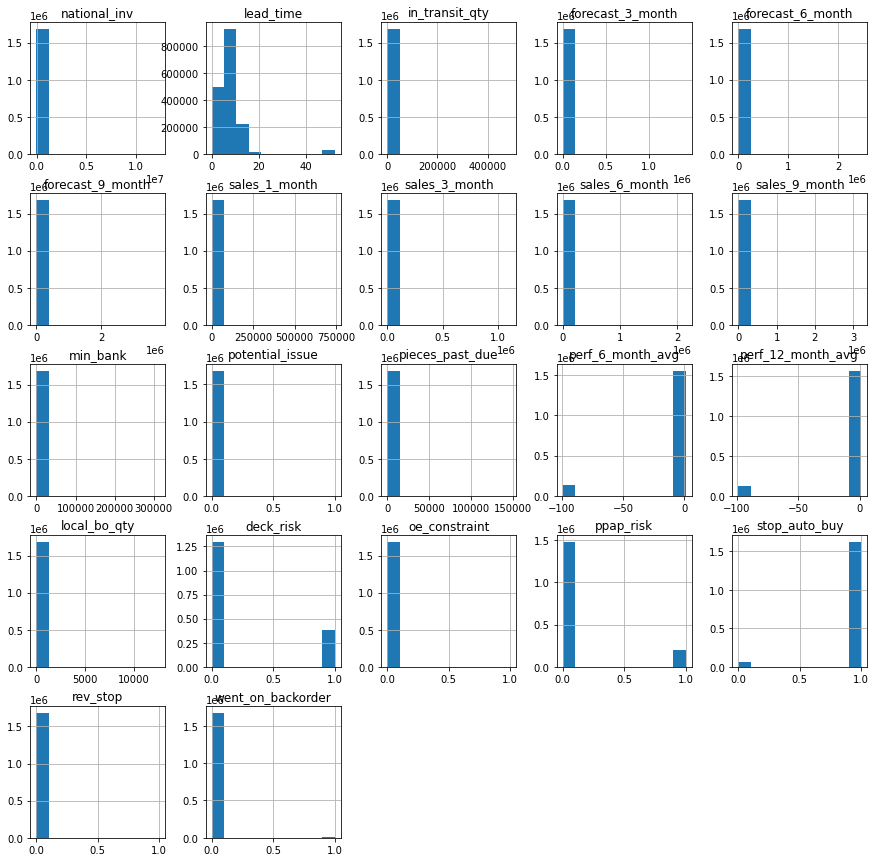

In [66]:
df.hist(figsize = (15,15))
plt.show()

In [67]:
df.perf_6_month_avg.value_counts()

 0.99     143757
 1.00     132329
-99.00    129478
 0.73     106468
 0.98      83611
           ...  
 0.20        861
 0.03        703
 0.04        652
 0.01        572
 0.29        515
Name: perf_6_month_avg, Length: 102, dtype: int64

In [68]:
df1 = df[df["perf_6_month_avg"] != -99.00]

In [69]:
df1.perf_6_month_avg.value_counts()

0.99    143757
1.00    132329
0.73    106468
0.98     83611
0.97     62531
         ...  
0.20       861
0.03       703
0.04       652
0.01       572
0.29       515
Name: perf_6_month_avg, Length: 101, dtype: int64

In [70]:
df1.shape

(1558382, 23)

In [71]:
df1.went_on_backorder.value_counts()

0    1547519
1      10863
Name: went_on_backorder, dtype: int64

In [72]:
#drop product id
df1.drop('sku', axis =1, inplace =True)

C:\Users\xboys\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
#because the dataset is too large. So I take only 1% of the dataset for the training
df2=df1.sample(frac = 0.01)

In [76]:
#remove class 1 values of went_on_backorder 
df2 = df2[df2.went_on_backorder !=1]

In [77]:
#take all the class 1 values of went_on_backorder in the original dataset
class1 = df1.loc[df1['went_on_backorder'] == 1]
class1

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
143,0.0,8.0,0.0,2.0,3.0,5.0,0.0,3.0,3.0,3.0,...,0.0,0.68,0.58,0.0,0,0,1,1,0,1
173,24.0,8.0,0.0,3456.0,3456.0,3456.0,10.0,39.0,68.0,93.0,...,0.0,1.00,0.95,1.0,0,0,1,1,0,1
180,30.0,8.0,14.0,42.0,84.0,126.0,7.0,56.0,107.0,148.0,...,0.0,0.98,0.92,0.0,0,0,0,1,0,1
191,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,...,0.0,0.49,0.72,525.0,0,0,0,1,0,1
450,1.0,8.0,2.0,26.0,38.0,46.0,8.0,14.0,27.0,42.0,...,0.0,0.97,0.94,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687822,0.0,8.0,0.0,25.0,25.0,25.0,0.0,9.0,20.0,29.0,...,0.0,0.95,0.96,1.0,0,0,0,1,0,1
1687826,-7.0,8.0,0.0,96.0,96.0,144.0,12.0,45.0,74.0,92.0,...,0.0,0.95,0.84,7.0,0,0,0,1,0,1
1687836,-94.0,8.0,25.0,786.0,1226.0,1697.0,304.0,457.0,731.0,1085.0,...,0.0,0.44,0.62,126.0,0,0,0,1,0,1
1687853,0.0,2.0,0.0,2071.0,3025.0,3412.0,4.0,764.0,764.0,765.0,...,0.0,0.98,0.99,4.0,0,0,0,0,0,1


In [78]:
#combine class 1 value and df2 dataset
df3 = pd.concat([class1,df2],ignore_index=True)

In [79]:
df3['went_on_backorder'].value_counts()

0    15481
1    10863
Name: went_on_backorder, dtype: int64

In [80]:
#save the new dataset as csv
df3.to_csv('Prepared_Data_TDi20364.csv', index=False)


### Feature Selection

In [81]:
#use variance threshold to select significant variables wth threshold =0.5
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.5)
vt.fit(df3)
pd.DataFrame({'Variance': vt.variances_, 'select_status':vt.get_support()}, index= df3.columns)

,Variance,select_status
national_inv,3.684871e+06,True
lead_time,3.206862e+01,True
in_transit_qty,6.141756e+04,True
forecast_3_month,2.266127e+06,True
forecast_6_month,6.251896e+06,True
forecast_9_month,1.231771e+07,True
sales_1_month,6.790121e+04,True
sales_3_month,4.691102e+05,True
sales_6_month,1.732745e+06,True
sales_9_month,4.522522e+06,True


In [82]:
df_vt  =df3.iloc[:,vt.get_support()]
df_vt['went_on_backorder'] = df3.went_on_backorder
df_vt.head()

<ipython-input-82-b287be6cfd59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vt['went_on_backorder'] = df3.went_on_backorder


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,local_bo_qty,went_on_backorder
0,0.0,8.0,0.0,2.0,3.0,5.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,1
1,24.0,8.0,0.0,3456.0,3456.0,3456.0,10.0,39.0,68.0,93.0,7.0,0.0,1.0,1
2,30.0,8.0,14.0,42.0,84.0,126.0,7.0,56.0,107.0,148.0,24.0,0.0,0.0,1
3,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,0.0,525.0,1
4,1.0,8.0,2.0,26.0,38.0,46.0,8.0,14.0,27.0,42.0,0.0,0.0,0.0,1


In [83]:
df_vt['went_on_backorder'].value_counts()

0    15481
1    10863
Name: went_on_backorder, dtype: int64

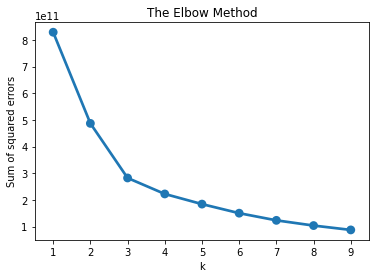

In [84]:
#use Elbow mehtod to find the best k
findElbow(df_vt)

In [85]:
target = df_vt['went_on_backorder']
features = df_vt.drop('went_on_backorder',axis=1)

In [86]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)


In [87]:
#need to install imblearn library from cmd prompt
#pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

### Train and Compare Various Classification Model

In [88]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as imbpipeline


names = [ "Nearest Neighbors", 
         "Naive Bayes", "Decision Tree", "Majority Vote", "Random Forest", "Bagging",  
         "AdaBoost", "XGBoost",'MLP']

scores = [] #list variable to hold classification scores (predictive accuracy scores)

#Prepare models for VotingClassifier 
lr =LogisticRegression(max_iter =500, random_state =42)
knn = KNeighborsClassifier(3)
dtc = DecisionTreeClassifier(max_depth=3)
gnbs = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

#specify the VotingClassifier() with soft voting

mv_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dtc', dtc)], voting='soft')

classifiers = [
    
    knn,
    gnbs,
    dtc,
    mv_clf,
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    BaggingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    mlp
]

#run classification models using Pipeline
#combining with smote for oversampling technique and standard scaler
#because smote is not in scilearn so we have to use imbpipeline instead of Pipeline 
for classifier in classifiers:
    pipeline = imbpipeline(steps=[
                      ('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    scores.append(pipeline.score(X_test, y_test))
    
    
#end of pipeline

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])
scores_df.sort_values(by='Accuracy Score', ascending=False)

C:\Users\xboys\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,Accuracy Score
7,XGBoost,0.885059
5,Bagging,0.882782
3,Majority Vote,0.872760
8,MLP,0.862891
0,Nearest Neighbors,0.859247
6,AdaBoost,0.856514
2,Decision Tree,0.828272
4,Random Forest,0.817340
1,Naive Bayes,0.451260


In [89]:
#xgb Classifier is the best model
xgb = XGBClassifier()
xgb.fit(X_train_SMOTE, y_train_SMOTE)
best_predict = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
score


C:\Users\xboys\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8850592165198907

In [90]:
from sklearn.metrics import classification_report
print('\n\nTuned Model Stats:')
print(classification_report(y_test, best_predict, target_names=['class 0', 'class 1']))



Tuned Model Stats:
              precision    recall  f1-score   support

     class 0       0.92      0.88      0.90      3851
     class 1       0.84      0.89      0.87      2735

    accuracy                           0.89      6586
   macro avg       0.88      0.89      0.88      6586
weighted avg       0.89      0.89      0.89      6586



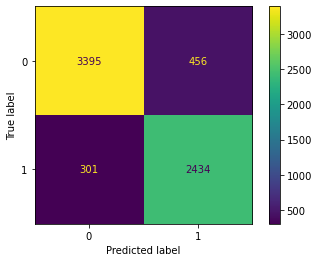

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

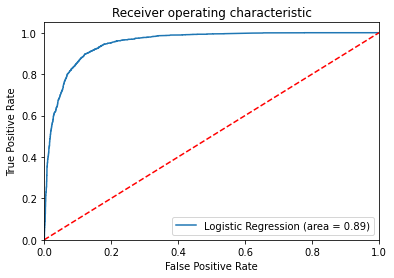

In [92]:
#plot the roc curve to see the performance of the model 
rocPlot(X_test,y_test,xgb)

### Out-of-sample Predictions

In [93]:
df_oos = pd.read_csv('Test_Dataset_v2.csv')
df_oos.head()

C:\Users\xboys\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [94]:
#take the columns exactly the same with the columns of training dataset(df_vt)
df_oos= df_oos[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'local_bo_qty', 'went_on_backorder']]

In [95]:
df_oos.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
pieces_past_due      float64
local_bo_qty         float64
went_on_backorder     object
dtype: object

In [96]:
#convert went_on_backorder to category variable
df_oos.went_on_backorder = pd.Categorical(df_oos.went_on_backorder)
df_oos['went_on_backorder'] = df_oos.went_on_backorder.cat.codes


In [97]:
df_oos.went_on_backorder.value_counts()

 0    239387
 1      2688
-1         1
Name: went_on_backorder, dtype: int64

In [98]:
#drop value -1 in column went_on_backorder
df_oos = df_oos.loc[df_oos['went_on_backorder'] != -1]

In [99]:
oos_features = df_oos.drop('went_on_backorder', axis=1)
oos_target = df_oos.went_on_backorder

In [100]:
#use the best trainned model (xgb) to predict the went_on_backorder value base on out-of-sample dataset
oos_predict = xgb.predict(oos_features)
score = xgb.score(oos_features, oos_target)
score

0.8997418155530311

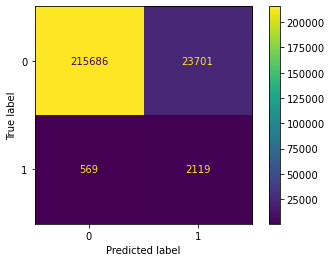

In [101]:
plot_confusion_matrix(xgb, oos_features, oos_target)  
plt.show()

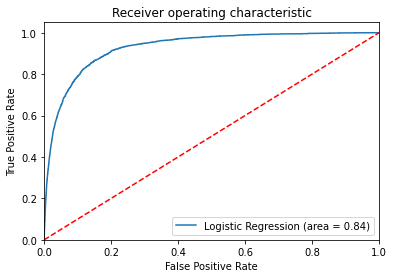

In [102]:
#plot the roc curve to see the performance of the model 
rocPlot(oos_features,oos_target,xgb)